# FastText, Facebook AI tarafından geliştirilmiş bir word embedding (kelime gömme) yöntemidir.

Word2Vec’e benzer şekilde kelimeleri vektör uzayında temsil eder, ancak onu farklı kılan özelliği **alt kelime parçalarını (subword)** dikkate almasıdır.

FastText, bir kelimeyi tek başına bir bütün olarak değil, içindeki daha küçük parçalara (subword, yani karakter n-gram’ları) bölerek temsil eder.


**Örneğin**

"kediler" kelimesinde

FastText, bu kelimeyi aşağıdaki gibi alt parçalara (subword’lere) böler:

•	ked, edi, dil, ile, ler gibi 3 karakterli parçalar

•	Ayrıca "< >" gibi baş ve son işaretleri de ekleyerek kelimenin başlangıç ve sonunu da dikkate alır.


not: FastText, az görülen veya görülmemiş (OOV - out of vocabulary) kelimeler için bile vektör oluşturabilir.

In [ ]:
!pip install gensim
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-h

ERROR: Operation cancelled by user
^C


In [ ]:
# örnek veri seti oluşturalım:

In [ ]:
sentences = [
    "Kedi pencerede oturuyor!!!",
    "Köpek bahçede mi koşuyor???",
    "Kuş gökyüzünde uçuyor.",
    "Kediler ve köpekler arkadaş olabilir mi?",
    "Bahçede oynayan çocukları izledik.",
    "Kedi mırlayarak uykuya daldı.",
    "Köpek havlayarak topun peşinden koştu.",
    "Kuş sabahları ötüyor.",
    "Kediciği camın önünde gördüm.",
    "Köpekçiği gezmeye çıkardık.",
    "Bahçede kediler güneşleniyor.",
    "Bahçede köpekler birbirleriyle oynuyor.",
    "Çocuklar kedileri seviyor.",
    "Kuşları pencereden izledik.",
    "Kedi mama yiyor.",
    "Köpek kemiğini gömdü.",
    "Kuş yuvasına uçtu.",
    "Kediler sessizce yürür.",
    "Köpekler sadık hayvanlardır.",
    "Kuşlar sabahları cıvıldar.",
    "Bahçede top oynayan çocuklar vardı.",
    "Çocuklar köpekle oynadı.",
    "Kedi pencereye tırmandı.",
    "Kuş uçarak çatıya kondu.",
    "Köpek kapının önünde bekliyor."
]


In [ ]:
# Küçük harf yap, noktalama temizle

import re
sentences_cleaned = [re.sub(r'[^\w\s]', '', s.lower()) for s in sentences]
sentences_cleaned

['kedi pencerede oturuyor',
 'köpek bahçede mi koşuyor',
 'kuş gökyüzünde uçuyor',
 'kediler ve köpekler arkadaş olabilir mi',
 'bahçede oynayan çocukları izledik',
 'kedi mırlayarak uykuya daldı',
 'köpek havlayarak topun peşinden koştu',
 'kuş sabahları ötüyor',
 'kediciği camın önünde gördüm',
 'köpekçiği gezmeye çıkardık',
 'bahçede kediler güneşleniyor',
 'bahçede köpekler birbirleriyle oynuyor',
 'çocuklar kedileri seviyor',
 'kuşları pencereden izledik',
 'kedi mama yiyor',
 'köpek kemiğini gömdü',
 'kuş yuvasına uçtu',
 'kediler sessizce yürür',
 'köpekler sadık hayvanlardır',
 'kuşlar sabahları cıvıldar',
 'bahçede top oynayan çocuklar vardı',
 'çocuklar köpekle oynadı',
 'kedi pencereye tırmandı',
 'kuş uçarak çatıya kondu',
 'köpek kapının önünde bekliyor']

**FastText modelinin eğitimi**

In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences_cleaned]

# FastText modelini eğitelim
ft_model = FastText(sentences=tokenized_sentences, # token'lara ayrılmış cümleler
                    vector_size=100,  # Her kelimenin vektör boyutu (embedding dimension)
                    window=3,    # Bir kelimenin çevresine bakılacak pencere boyutu (context window)
                    min_count=1, # En az kaç kez geçen kelimeler modele alınacak (1: tüm kelimeleri al)
                    sg=1,        # 1: Skip-gram kullan (0 olursa CBOW kullanılır)
                    epochs=10)   # Eğitim döngüsü sayısı (kaç kez veri üzerinden geçilsin)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
print(tokenized_sentences)

[['kedi', 'pencerede', 'oturuyor'], ['köpek', 'bahçede', 'mi', 'koşuyor'], ['kuş', 'gökyüzünde', 'uçuyor'], ['kediler', 've', 'köpekler', 'arkadaş', 'olabilir', 'mi'], ['bahçede', 'oynayan', 'çocukları', 'izledik'], ['kedi', 'mırlayarak', 'uykuya', 'daldı'], ['köpek', 'havlayarak', 'topun', 'peşinden', 'koştu'], ['kuş', 'sabahları', 'ötüyor'], ['kediciği', 'camın', 'önünde', 'gördüm'], ['köpekçiği', 'gezmeye', 'çıkardık'], ['bahçede', 'kediler', 'güneşleniyor'], ['bahçede', 'köpekler', 'birbirleriyle', 'oynuyor'], ['çocuklar', 'kedileri', 'seviyor'], ['kuşları', 'pencereden', 'izledik'], ['kedi', 'mama', 'yiyor'], ['köpek', 'kemiğini', 'gömdü'], ['kuş', 'yuvasına', 'uçtu'], ['kediler', 'sessizce', 'yürür'], ['köpekler', 'sadık', 'hayvanlardır'], ['kuşlar', 'sabahları', 'cıvıldar'], ['bahçede', 'top', 'oynayan', 'çocuklar', 'vardı'], ['çocuklar', 'köpekle', 'oynadı'], ['kedi', 'pencereye', 'tırmandı'], ['kuş', 'uçarak', 'çatıya', 'kondu'], ['köpek', 'kapının', 'önünde', 'bekliyor']]


In [ ]:
# kelime vektörlerini inceleyelim:

# 'kedi' kelimesinin vektörü
print(ft_model.wv['kedi'])

[ 2.8690018e-03  1.0828675e-03 -9.2375645e-04  1.8535160e-05
 -3.3495813e-03 -6.6020642e-04  6.5081374e-04  4.4927580e-04
 -9.3085371e-04 -1.3696131e-03 -1.5555277e-03  3.3089973e-04
 -2.2959663e-03  9.3479356e-04 -1.8522724e-03  1.2252438e-03
  5.2681742e-03  4.7090445e-03 -4.6151120e-04  1.0601664e-04
  1.0712732e-03  2.5924240e-04 -3.4965284e-03  5.6877319e-04
  6.6635222e-04 -6.3184486e-04 -4.5701568e-03 -1.1115272e-03
 -7.4048195e-04  1.3606407e-03  2.0431986e-03  1.1687704e-03
  1.3600971e-03  2.5488944e-03 -5.8014638e-04  3.4146884e-03
  4.1454242e-04 -1.4129943e-03  1.5890673e-03  7.5874943e-04
  1.6401331e-03 -4.6235460e-04 -9.8477665e-04  1.8606501e-03
 -2.8975783e-03  1.5314121e-03  2.6165571e-03  7.4215321e-04
 -1.4114929e-03 -2.1893324e-03  1.2454892e-03  7.7246706e-04
  5.8501639e-04 -1.1967649e-03  1.9393084e-03  2.5911042e-03
  1.5192759e-03 -2.7958115e-04 -2.1345951e-03  3.1113825e-03
 -1.0508726e-03  3.7526414e-03 -5.3988170e-04 -7.3769561e-04
  2.0911752e-03 -1.29905

In [ ]:
# En benzer 3 kelime:
print(ft_model.wv.most_similar('kedi', topn=3))

[('kediler', 0.5106750130653381), ('kedileri', 0.4473869204521179), ('kediciği', 0.4072761833667755)]


In [ ]:
# verisetinde olmayan kelimeler için deneyelim:
# "kedimi" modelde eğitim sırasında yoktu ama alt-parçaları ile vektörünü çıkarabiliyor
print(ft_model.wv['kedimi'])

[ 6.8142795e-04  1.6901913e-03 -7.5409969e-04  2.2461147e-03
  3.1970572e-04 -8.9285959e-04  1.9385208e-03  1.2936736e-03
  9.9260779e-04 -2.0757513e-03  3.1381747e-05  7.9328573e-04
 -4.3759981e-04  4.8753258e-04 -4.7538968e-04 -6.7818351e-04
  6.6046283e-04  2.2492176e-03 -1.9580670e-04  8.8906218e-04
  1.2670300e-03 -2.3015897e-04  3.6654866e-04  3.3006433e-04
 -1.7575963e-03 -2.7500284e-03 -1.1870257e-03 -1.4822239e-03
  8.8973652e-04 -1.6822164e-04 -8.8411447e-04  6.4602535e-04
  1.4380629e-03  1.9466140e-03 -1.4468462e-03  1.5676585e-03
  2.2708210e-03 -6.4675644e-04  6.2869431e-04  4.9762125e-04
  1.0354066e-03  1.4691880e-03  5.9796474e-04 -1.0647447e-04
 -2.5401905e-03 -2.6531512e-04  1.9878792e-04  8.7684777e-04
  1.2175030e-04 -1.1159597e-03  4.6221438e-05  3.6310093e-04
 -2.1618411e-04  2.3087887e-03  2.3212250e-04  1.7253902e-03
  5.3486251e-04 -9.6202060e-04 -1.6767154e-03  2.1471448e-04
 -4.7199728e-04  2.3798882e-03  3.1667374e-04 -1.4000190e-04
  4.7813437e-04 -6.82936

In [ ]:
# Benzer kelimelere bakalım
print(ft_model.wv.most_similar('kedimi', topn=3))

[('kedi', 0.48889419436454773), ('kediler', 0.2733496427536011), ('kuşları', 0.24148043990135193)]


In [ ]:
# iki kelime arasındaki benzerliğe bakalım:

ft_model.wv.similarity('kedi', 'kediler')

0.5106751

In [ ]:
# verisetinde olmayan bir kelime ile olan kelime arasındaki benzerliğe bakalım:

ft_model.wv.similarity('kedi', 'kedimi')

0.48889422

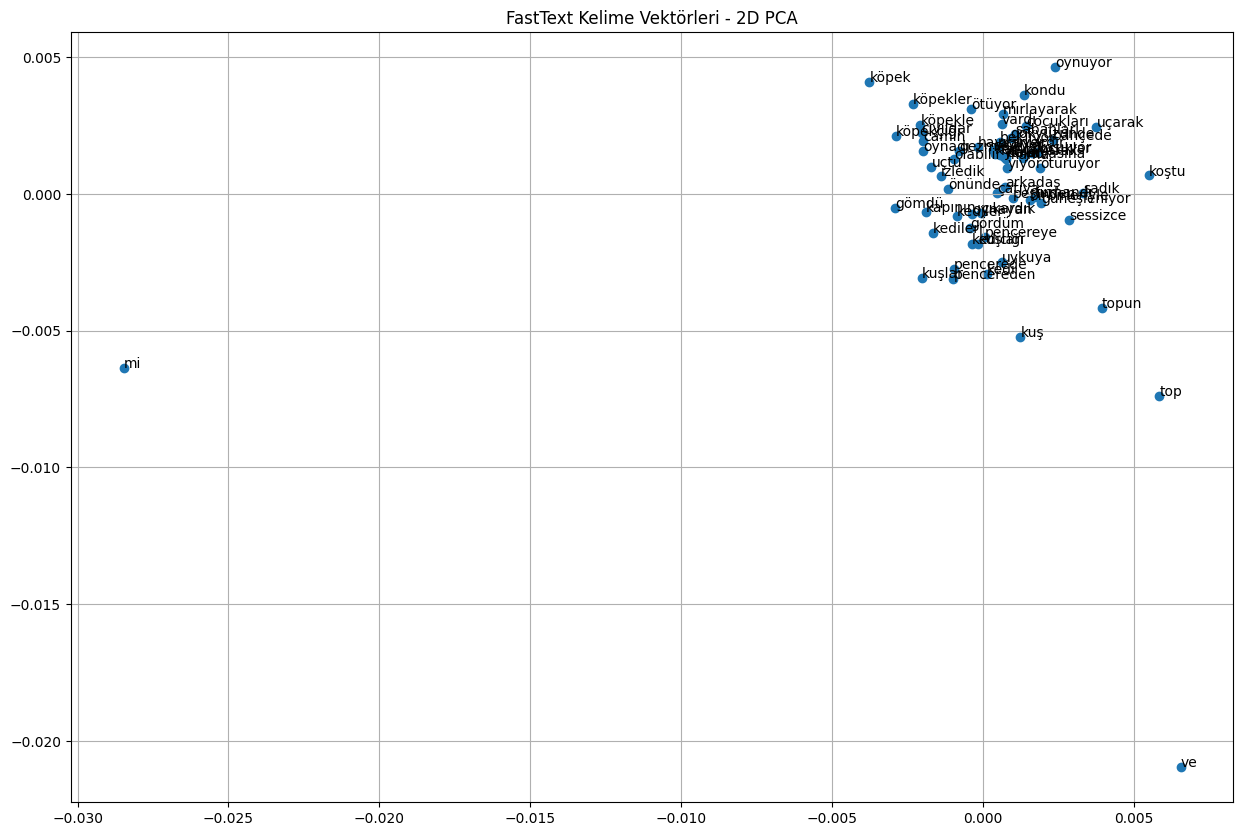

In [ ]:
# PCA ile görselleştirme:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# öncelikle Cümleleri temizleyip tokenize edelim:

all_words = []
for sentence in sentences:
    # Küçük harfe çevir ve noktalama işaretlerini kaldır
    cleaned = re.sub(r'[^\w\s]', '', sentence.lower())
    tokens = word_tokenize(cleaned)
    all_words.extend(tokens)

# Benzersiz kelimeleri alalım
words = list(set(all_words))

word_vectors = [ft_model.wv[word] for word in words if word in ft_model.wv]

# PCA ile 2D'ye indir
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Görselleştir
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("FastText Kelime Vektörleri - 2D PCA")
plt.grid()
plt.show()


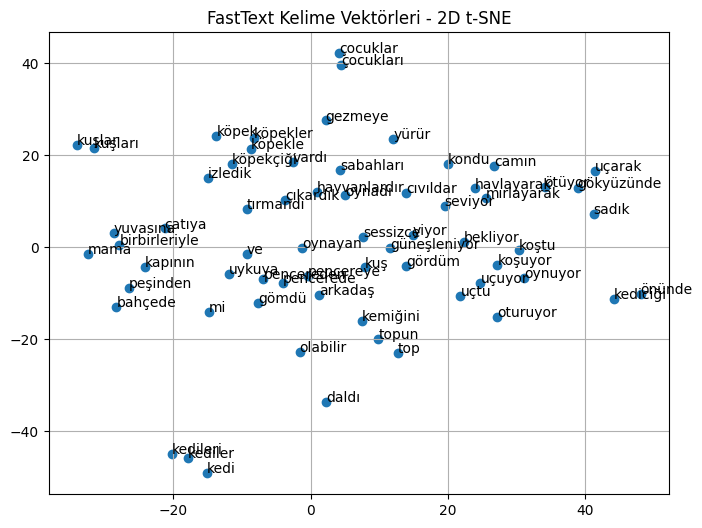

In [ ]:
# TSNE ile görselleştirme:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


word_vectors = [ft_model.wv[word] for word in words if word in ft_model.wv]

# t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, perplexity=4, max_iter=1000, random_state=42)
result = tsne.fit_transform(np.array(word_vectors))

# Görselleştir
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("FastText Kelime Vektörleri - 2D t-SNE")
plt.grid()
plt.show()

FastText, alt-kelime parçalarını dikkate alarak kelimelere daha anlamlı ve genelleştirilebilir vektörler üretir.

Özellikle Türkçe gibi eklemeli dillerde Word2Vec'e göre daha başarılı sonuçlar verebilir.

Bu örnekte küçük bir veriyle çalıştık, ancak büyük veri setlerinde önceden eğitilmiş FastText modelleri kullanmak mümkündür.